# Flight Delay Prediction

Data from the US department of transportation:
https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?pn=1



In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('airline_delay.csv')
data.shape

(256285, 21)

In [2]:
data.head(10)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2003,6,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",307.0,56.0,14.68,10.79,...,1.48,9.96,1.0,1.0,2530.0,510.0,621.0,676.0,25.0,698.0
1,2003,6,AA,American Airlines Inc.,ANC,"Anchorage, AK: Ted Stevens Anchorage Internati...",90.0,27.0,7.09,2.00,...,0.00,7.16,0.0,0.0,1390.0,271.0,83.0,581.0,0.0,455.0
2,2003,6,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",752.0,186.0,33.99,27.82,...,1.90,17.53,5.0,0.0,8314.0,1367.0,1722.0,3817.0,139.0,1269.0
3,2003,6,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",842.0,174.0,60.24,20.54,...,4.69,40.75,9.0,1.0,8344.0,3040.0,1032.0,1835.0,115.0,2322.0
4,2003,6,AA,American Airlines Inc.,BDL,"Hartford, CT: Bradley International",383.0,55.0,14.90,8.91,...,0.00,16.61,0.0,0.0,3137.0,815.0,574.0,555.0,0.0,1193.0
5,2003,6,AA,American Airlines Inc.,BHM,"Birmingham, AL: Birmingham-Shuttlesworth Inter...",89.0,12.0,2.79,2.19,...,1.00,3.82,0.0,0.0,673.0,94.0,90.0,50.0,35.0,404.0
6,2003,6,AA,American Airlines Inc.,BNA,"Nashville, TN: Nashville International",445.0,82.0,25.44,11.98,...,0.03,26.65,2.0,0.0,4663.0,1217.0,913.0,800.0,1.0,1732.0
7,2003,6,AA,American Airlines Inc.,BOS,"Boston, MA: Logan International",1266.0,225.0,69.43,23.66,...,2.25,45.73,7.0,0.0,12139.0,4201.0,1783.0,3067.0,45.0,3043.0
8,2003,6,AA,American Airlines Inc.,BUR,"Burbank, CA: Bob Hope",119.0,27.0,7.49,4.65,...,0.00,7.04,1.0,0.0,1187.0,326.0,191.0,285.0,0.0,385.0
9,2003,6,AA,American Airlines Inc.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",593.0,101.0,17.56,20.49,...,0.00,24.69,1.0,1.0,5698.0,1058.0,1332.0,1708.0,0.0,1600.0


The above Table shows the structure of the downloaded data from DOT. Before doing data analysis, the First Step is cleaning data, and drop null data. 

In [3]:
pd.concat([data.isnull().sum(), 100 * data.isnull().sum()/len(data)], 
              axis=1).rename(columns={0:'Missing Data', 1:'Percentage (%)'})

,Missing Data,Percentage (%)
year,0,0.000000
month,0,0.000000
carrier,0,0.000000
carrier_name,0,0.000000
airport,0,0.000000
airport_name,0,0.000000
arr_flights,362,0.141249
arr_del15,416,0.162319
carrier_ct,362,0.141249
weather_ct,362,0.141249


In [4]:
data.dropna(inplace = True)

In [5]:
totalyear=17
totalmonth = 12
delay_causes = 7
NUM = len(data)
company_list = data['carrier'].unique()
airport_list = data['airport'].unique()


#print(NUM)
#print(airport_list) 
#print(len(airport_list))

100 <.< 1000 Line2D(100 <.< 1000)
1000 <.< 10000 Line2D(1000 <.< 10000)
10000 <.< 100000 Line2D(10000 <.< 100000)
100000 <.< 1000000 Line2D(100000 <.< 1000000)
1000000 <.< 10000000 Line2D(1000000 <.< 10000000)


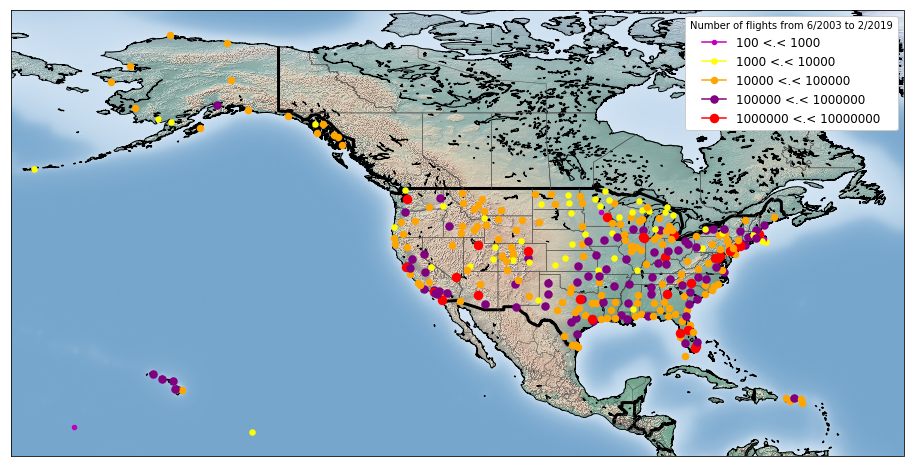

In [137]:
from collections import OrderedDict
from mpl_toolkits.basemap import Basemap

airports = pd.read_csv("airports.csv")

#count_flights = data['airport'].value_counts()
count_flights = data.groupby('airport', as_index=False).agg({'arr_flights': 'sum'})
#___________________________
plt.figure(figsize=(16,16))
#________________________________________
# define properties of markers and labels
colors = ['lightblue', 'm','yellow', 'orange', 'purple', 'red' ]
size_limits = [1, 100, 1000, 10000, 100000, 1000000, 10000000]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1])) 
#____________________________________________________________
map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth = 3)
map.drawstates(color='0.3')
#_____________________
# put airports on map
for index, (code, y,x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)
    val0 = count_flights[count_flights.airport==code].arr_flights.item()
    isize = [i for i, val in enumerate(size_limits) if val < val0]
    ind = isize[-1]
    map.plot(x, y, marker='o', markersize = ind+3, 
             markeredgewidth = 1.5, color = colors[ind], label = labels[ind])

#_____________________________________________
# remove duplicate labels and set their order
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = ('100 <.< 1000', '1000 <.< 10000'
             ,'10000 <.< 100000', '100000 <.< 1000000', '1000000 <.< 10000000')
new_label = OrderedDict()
for key in key_order:
    new_label[key] = by_label[key]
    #print(key,by_label[key])
plt.legend(new_label.values(), new_label.keys(), loc = 'best', prop= {'size':12},
           title='Number of flights from 6/2003 to 2/2019', frameon = True, framealpha = 1)
plt.show()

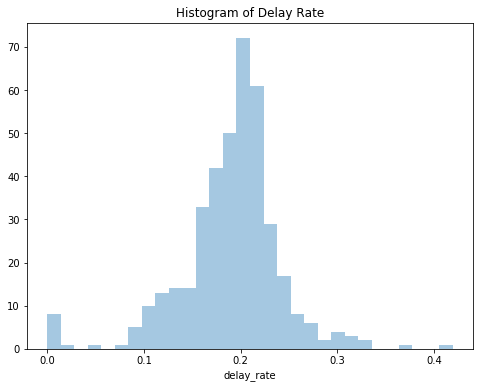

In [158]:
#import numpy as np
#np.set_printoptions(threshold=np.inf)

#count_flights = data.groupby('airport').agg({'arr_flights': 'sum'}).sort_values('arr_flights', ascending=False) 
#count_flights = data['airport'].value_counts()
#count_flights = data.groupby('airport', as_index=False).agg({'arr_flights': 'sum'})
#count_flights
#count_flights.loc[count_flights['airport'] == 'ABE']

#count_flights[count_flights.airport=='ABE'].airport.item()

count_delays = data.groupby('airport', as_index=False).agg({'arr_del15': 'sum'})

count_delays['delay_rate'] = count_delays['arr_del15']/count_flights['arr_flights']
count_delays = count_delays[count_delays['delay_rate'] < 1.0]
#count_delays

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.distplot(count_delays['delay_rate'],bins=30,kde=False)
ax.set_title('Histogram of Delay Rate')
plt.show()

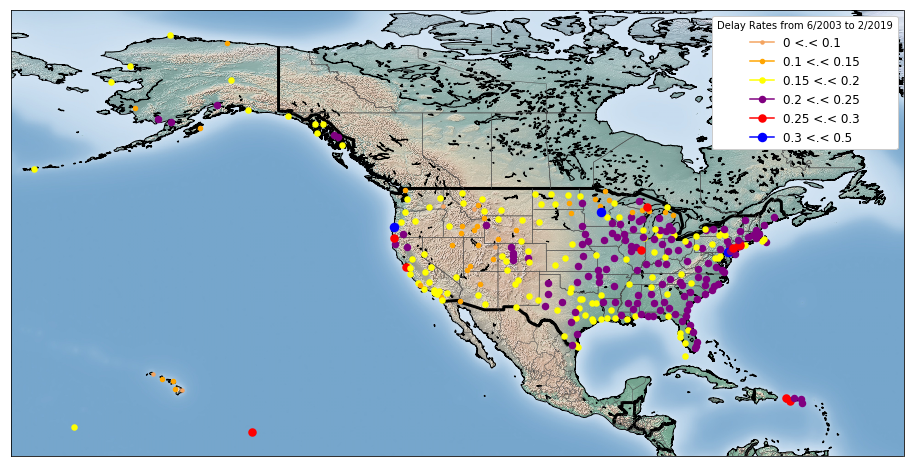

In [37]:
plt.figure(figsize=(16,16))
#________________________________________
# define properties of markers and labels
colors = ['sandybrown','orange', 'yellow', 'purple', 'red','blue' ]
size_limits = [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1]))

#labels

#____________________________________________________________
map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth = 3)
map.drawstates(color='0.3')

for index, (code, y,x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)
    val0 = count_delays[count_delays.airport==code].delay_rate.item()
    isize = [i for i, val in enumerate(size_limits) if val < val0]
    ind = isize[-1]
    map.plot(x, y, marker='o', markersize = ind+3, 
             markeredgewidth = 1.5, color = colors[ind], label = labels[ind])
    #print(index,val0,isize)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

#print(by_label)

key_order = ('0 <.< 0.1', '0.1 <.< 0.15','0.15 <.< 0.2', 
             '0.2 <.< 0.25','0.25 <.< 0.3', '0.3 <.< 0.5')
new_label = OrderedDict()
for key in key_order:
    new_label[key] = by_label[key]
    #print(key,by_label[key])

plt.legend(new_label.values(), new_label.keys(), loc = 'best', prop= {'size':12},
           title='Delay Rates from 6/2003 to 2/2019', frameon = True, framealpha = 1)
plt.show()

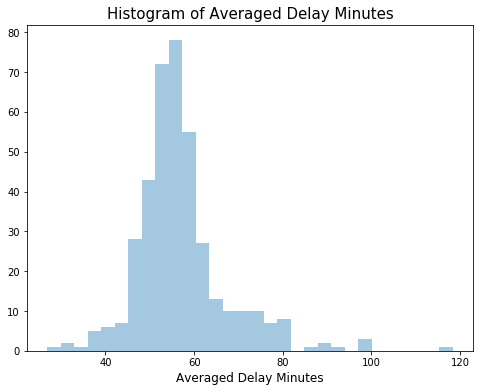

In [159]:
data_temp = data.groupby('airport', as_index=False).agg({'arr_delay': 'sum'})
count_delays['delay_min']=data_temp['arr_delay']/count_delays['arr_del15']
#count_delays['arr_del15']
#data_temp['arr_delay']
#count_delays

count_delays = count_delays[count_delays['delay_min'] < 120.0]

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.distplot(count_delays['delay_min'],bins=30,kde=False)
ax.set_title('Histogram of Averaged Delay Minutes',size='15')
ax.set_xlabel('Averaged Delay Minutes',size='12')
plt.show()

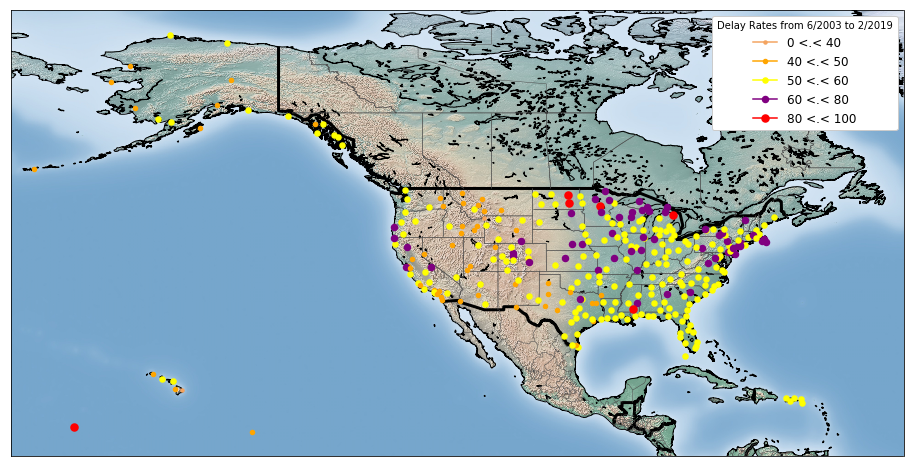

In [61]:
plt.figure(figsize=(16,16))
#________________________________________
# define properties of markers and labels
colors = ['sandybrown','orange', 'yellow', 'purple', 'red','blue' ]
size_limits = [0, 40, 50, 60, 80, 100, 120]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1]))

labels

#____________________________________________________________
map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth = 3)
map.drawstates(color='0.3')

for index, (code, y,x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)
    val0 = count_delays[count_delays.airport==code].delay_min.item()
    isize = [i for i, val in enumerate(size_limits) if val < val0]
    ind = isize[-1]
    map.plot(x, y, marker='o', markersize = ind+3, 
             markeredgewidth = 1.5, color = colors[ind], label = labels[ind])
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

#print(by_label)

#key_order = ('0 <.< 40', '40 <.< 50','50 <.< 60', 
             #'60 <.< 80','80 <.< 100', '100 <.< 120')
#new_label = OrderedDict()
#for key in key_order:
    #new_label[key] = by_label[key]
    #print(key,by_label[key])

plt.legend(new_label.values(), new_label.keys(), loc = 'best', prop= {'size':12},
           title='Averaged Delay Minutes from 6/2003 to 2/2019', frameon = True, framealpha = 1)
plt.show()

Carrier Linear Score: 0.020093147799164268
Carrier Linear AA Score: -0.5023143830695236
Carrier Linear ATL Score: -2.0600789069839975

NAS Linear Score: 0.46378927417979876
NAS Linear AA Score: -0.11007067496092371
NAS Linear ATL Score: 0.07002860494690344

Latecraft Linear Score: 0.10351660568906929
Latecraft Linear AA Score: -0.158307231332254
Latecraft Linear ATL Score: -0.7672761380681956


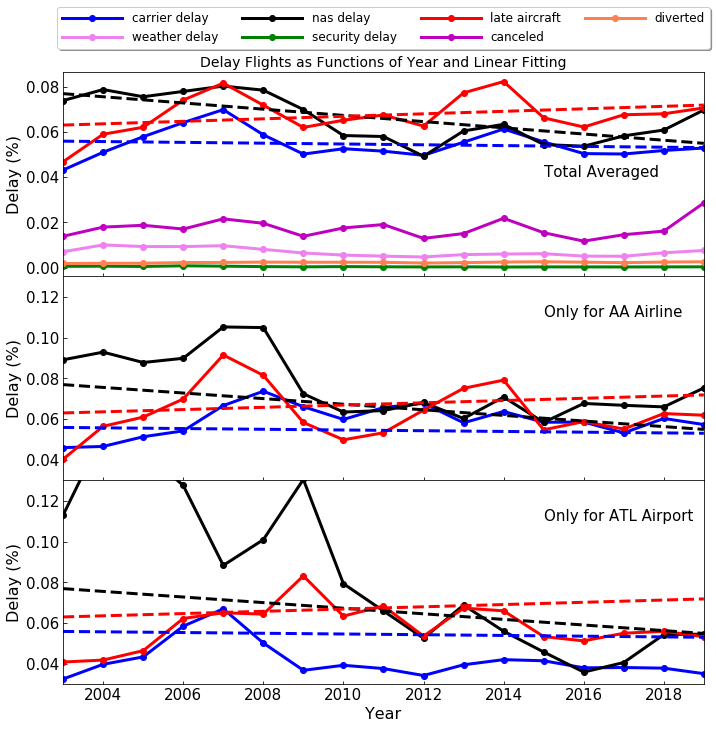

In [219]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

year_delays = data.groupby('year', as_index=False).sum()


X1 = year_delays['year'].values
Y_deltot  = year_delays['arr_del15'].values/year_delays['arr_flights'].values
Y_carrier = year_delays['carrier_ct'].values/year_delays['arr_flights'].values
Y_weather = year_delays['weather_ct'].values/year_delays['arr_flights'].values
Y_nas = year_delays['nas_ct'].values/year_delays['arr_flights'].values
Y_security = year_delays['security_ct'].values/year_delays['arr_flights'].values
Y_latecraft = year_delays['late_aircraft_ct'].values/year_delays['arr_flights'].values
Y_cancelled = year_delays['arr_cancelled'].values/year_delays['arr_flights'].values
Y_diverted = year_delays['arr_diverted'].values/year_delays['arr_flights'].values

linear = linear_model.LinearRegression()
X_fit = year_delays.filter(regex='year').values
linear.fit(X_fit,Y_carrier)
Y_carrier_pred = linear.predict(X_fit)
print("Carrier Linear Score:", linear.score(X_fit,Y_carrier))
print("Carrier Linear AA Score:", linear.score(X_fit,Y_carrier_AA))
print("Carrier Linear ATL Score:", linear.score(X_fit,Y_carrier_ATL))

linear.fit(X_fit,Y_nas)
Y_nas_pred = linear.predict(X_fit)
print("\nNAS Linear Score:", linear.score(X_fit,Y_nas))
print("NAS Linear AA Score:", linear.score(X_fit,Y_nas_AA))
print("NAS Linear ATL Score:", linear.score(X_fit,Y_nas_ATL))

linear.fit(X_fit,Y_latecraft)
Y_latecraft_pred = linear.predict(X_fit)
print("\nLatecraft Linear Score:", linear.score(X_fit,Y_latecraft))
print("Latecraft Linear AA Score:", linear.score(X_fit,Y_latecraft_AA))
print("Latecraft Linear ATL Score:", linear.score(X_fit,Y_latecraft_ATL))

data_AA = data[data['carrier'].str.contains('AA')]
year_delays_AA = data_AA.groupby('year', as_index=False).sum()
Y_carrier_AA = year_delays_AA['carrier_ct'].values/year_delays_AA['arr_flights'].values
Y_nas_AA = year_delays_AA['nas_ct'].values/year_delays_AA['arr_flights'].values
Y_latecraft_AA = year_delays_AA['late_aircraft_ct'].values/year_delays_AA['arr_flights'].values


data_ATL = data[data['airport'].str.contains('ATL')]
year_delays_ATL = data_ATL.groupby('year', as_index=False).sum()
Y_carrier_ATL = year_delays_ATL['carrier_ct'].values/year_delays_ATL['arr_flights'].values
Y_nas_ATL = year_delays_ATL['nas_ct'].values/year_delays_ATL['arr_flights'].values
Y_latecraft_ATL = year_delays_ATL['late_aircraft_ct'].values/year_delays_ATL['arr_flights'].values


fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(311)

ax1.plot(X1,Y_carrier,'-o',linewidth=3,color='blue')
ax1.plot(X1,Y_weather,'-o',linewidth=3,color='violet')
ax1.plot(X1,Y_nas,'-o',linewidth=3,color='black')
ax1.plot(X1,Y_security,'-o',linewidth=3,color='green')
ax1.plot(X1,Y_latecraft,'-o',linewidth=3,color='red')
ax1.plot(X1,Y_cancelled,'-o',linewidth=3,color='m')
ax1.plot(X1,Y_diverted,'-o',linewidth=3,color='coral')
ax1.plot(X1,Y_carrier_pred,'--',linewidth=3,color='blue')
ax1.plot(X1,Y_nas_pred,'--',linewidth=3,color='black')
ax1.plot(X1,Y_latecraft_pred,'--',linewidth=3,color='red')
ax1.tick_params(labelsize=15,direction='in')
ax1.legend(['carrier delay','weather delay','nas delay','security delay','late aircraft','canceled','diverted'], 
           fontsize=12,handlelength=5,frameon=True,loc='upper center', bbox_to_anchor=(0.5, 1.35),
           fancybox=True, shadow=True, ncol=4)
plt.setp(ax1.get_xticklabels(),visible=False)
ax1.set_ylabel('Delay (%)',fontsize=16)
ax1.set_xlim([2003,2019])
plt.title('Delay Flights as Functions of Year and Linear Fitting',fontsize=14)

plt.subplots_adjust(hspace=0)

ax2 = fig.add_subplot(312)
ax2.plot(X1,Y_carrier_AA,'-o',linewidth=3,color='blue')
ax2.plot(X1,Y_nas_AA,'-o',linewidth=3,color='black')
ax2.plot(X1,Y_latecraft_AA,'-o',linewidth=3,color='red')
ax2.plot(X1,Y_carrier_pred,'--',linewidth=3,color='blue')
ax2.plot(X1,Y_nas_pred,'--',linewidth=3,color='black')
ax2.plot(X1,Y_latecraft_pred,'--',linewidth=3,color='red')
ax2.tick_params(labelsize=15,direction='in')
plt.setp(ax2.get_xticklabels(),visible=False)
ax2.set_ylabel('Delay (%)',fontsize=16)
ax2.set_xlim([2003,2019])
ax2.set_ylim([0.03,0.13])

plt.subplots_adjust(hspace=0)


ax3 = fig.add_subplot(313)
ax3.plot(X1,Y_carrier_ATL,'-o',linewidth=3,color='blue')
ax3.plot(X1,Y_nas_ATL,'-o',linewidth=3,color='black')
ax3.plot(X1,Y_latecraft_ATL,'-o',linewidth=3,color='red')
ax3.plot(X1,Y_carrier_pred,'--',linewidth=3,color='blue')
ax3.plot(X1,Y_nas_pred,'--',linewidth=3,color='black')
ax3.plot(X1,Y_latecraft_pred,'--',linewidth=3,color='red')
ax3.tick_params(labelsize=15,direction='in')
#plt.setp(ax3.get_xticklabels(),visible=False)
ax3.set_xlabel('Year',fontsize=16)
ax3.set_ylabel('Delay (%)',fontsize=16)
ax3.set_xlim([2003,2019])
ax3.set_ylim([0.03,0.13])

ax1.annotate('Total Averaged', xy=(2015,0.04),fontsize=15)
ax2.annotate('Only for AA Airline', xy=(2015,0.11),fontsize=15)
ax3.annotate('Only for ATL Airport', xy=(2015,0.11),fontsize=15)

fig.subplots_adjust(left=0.08,right=0.97,bottom=0.05,top=0.9)


plt.show()
#year_delays

Carrier Poly Score: 0.30948036350203956
Carrier Poly AA Score: -0.06640631119382756
Carrier Poly ATL Score: -1.8320479514346446

NAS Poly Score: 0.8000332197280068
NAS Poly AA Score: 0.09924913719884809
NAS Poly ATL Score: 0.13656857493973773

Latecraft Poly Score: 0.41042010918103333
Latecraft Poly AA Score: 0.09026058301755191
Latecraft Poly ATL Score: -0.2614501431568521


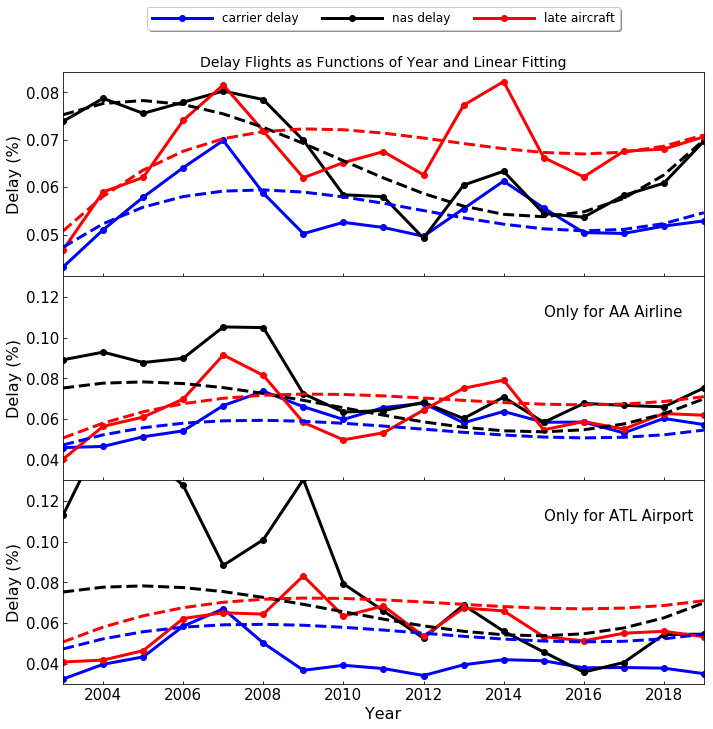

In [222]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_fit_ = poly.fit_transform(X_fit)

linear.fit(X_fit_,Y_carrier)
Y_carrier_pred_ = linear.predict(X_fit_)
print("Carrier Poly Score:", linear.score(X_fit_,Y_carrier))
print("Carrier Poly AA Score:", linear.score(X_fit_,Y_carrier_AA))
print("Carrier Poly ATL Score:", linear.score(X_fit_,Y_carrier_ATL))

linear.fit(X_fit_,Y_nas)
Y_nas_pred_ = linear.predict(X_fit_)
print("\nNAS Poly Score:", linear.score(X_fit_,Y_nas))
print("NAS Poly AA Score:", linear.score(X_fit_,Y_nas_AA))
print("NAS Poly ATL Score:", linear.score(X_fit_,Y_nas_ATL))

linear.fit(X_fit_,Y_latecraft)
Y_latecraft_pred_ = linear.predict(X_fit_)
print("\nLatecraft Poly Score:", linear.score(X_fit_,Y_latecraft))
print("Latecraft Poly AA Score:", linear.score(X_fit_,Y_latecraft_AA))
print("Latecraft Poly ATL Score:", linear.score(X_fit_,Y_latecraft_ATL))



fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(311)

ax1.plot(X1,Y_carrier,'-o',linewidth=3,color='blue')
ax1.plot(X1,Y_nas,'-o',linewidth=3,color='black')
ax1.plot(X1,Y_latecraft,'-o',linewidth=3,color='red')
ax1.plot(X1,Y_carrier_pred_,'--',linewidth=3,color='blue')
ax1.plot(X1,Y_nas_pred_,'--',linewidth=3,color='black')
ax1.plot(X1,Y_latecraft_pred_,'--',linewidth=3,color='red')
ax1.tick_params(labelsize=15,direction='in')
ax1.legend(['carrier delay','nas delay','late aircraft'], 
           fontsize=12,handlelength=5,frameon=True,loc='upper center', bbox_to_anchor=(0.5, 1.35),
           fancybox=True, shadow=True, ncol=4)
plt.setp(ax1.get_xticklabels(),visible=False)
ax1.set_ylabel('Delay (%)',fontsize=16)
ax1.set_xlim([2003,2019])
plt.title('Delay Flights as Functions of Year and Linear Fitting',fontsize=14)

plt.subplots_adjust(hspace=0)

ax2 = fig.add_subplot(312)
ax2.plot(X1,Y_carrier_AA,'-o',linewidth=3,color='blue')
ax2.plot(X1,Y_nas_AA,'-o',linewidth=3,color='black')
ax2.plot(X1,Y_latecraft_AA,'-o',linewidth=3,color='red')
ax2.plot(X1,Y_carrier_pred_,'--',linewidth=3,color='blue')
ax2.plot(X1,Y_nas_pred_,'--',linewidth=3,color='black')
ax2.plot(X1,Y_latecraft_pred_,'--',linewidth=3,color='red')
ax2.tick_params(labelsize=15,direction='in')
plt.setp(ax2.get_xticklabels(),visible=False)
ax2.set_ylabel('Delay (%)',fontsize=16)
ax2.set_xlim([2003,2019])
ax2.set_ylim([0.03,0.13])

plt.subplots_adjust(hspace=0)


ax3 = fig.add_subplot(313)
ax3.plot(X1,Y_carrier_ATL,'-o',linewidth=3,color='blue')
ax3.plot(X1,Y_nas_ATL,'-o',linewidth=3,color='black')
ax3.plot(X1,Y_latecraft_ATL,'-o',linewidth=3,color='red')
ax3.plot(X1,Y_carrier_pred_,'--',linewidth=3,color='blue')
ax3.plot(X1,Y_nas_pred_,'--',linewidth=3,color='black')
ax3.plot(X1,Y_latecraft_pred_,'--',linewidth=3,color='red')
ax3.tick_params(labelsize=15,direction='in')
#plt.setp(ax3.get_xticklabels(),visible=False)
ax3.set_xlabel('Year',fontsize=16)
ax3.set_ylabel('Delay (%)',fontsize=16)
ax3.set_xlim([2003,2019])
ax3.set_ylim([0.03,0.13])

ax1.annotate('Total Averaged', xy=(2015,0.04),fontsize=15)
ax2.annotate('Only for AA Airline', xy=(2015,0.11),fontsize=15)
ax3.annotate('Only for ATL Airport', xy=(2015,0.11),fontsize=15)

fig.subplots_adjust(left=0.08,right=0.97,bottom=0.05,top=0.9)


plt.show()